I have begun to work with the 2018 data from the CDC. Once complete, the same process can be applied to most previous years. 
Data guide: https://www.cdc.gov/nchs/nvss/mortality_public_use_data.htm

Text file: https://www.cdc.gov/nchs/data_access/vitalstatsonline.htm#Mortality_Multiple

Alternate data: https://www.kaggle.com/cdc/nchs-death-rates-and-causes-of-death

Alternate data: https://data.nber.org/mortality/

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df_table = pd.read_table('ftp://ftp.cdc.gov/pub/Health_Statistics/NCHS/Datasets/DVS/mortality/mort2018us.zip', header=None)

In [3]:
df_table.head(1)

,0
0,3 ...


In [4]:
df_table.iloc[0]

0                       3                          ...
Name: 0, dtype: object

In [5]:
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 2000)
    pd.set_option('display.float_format', '{:20,.2f}'.format)
    pd.set_option('display.max_colwidth', None)
    print(x)
    pd.reset_option('display.max_rows')
    pd.reset_option('display.max_columns')
    pd.reset_option('display.width')
    pd.reset_option('display.float_format')
    pd.reset_option('display.max_colwidth')

In [6]:
print_full(df_table.iloc[0])

0                       3                                          3101  F1046 351507  1D2                2018U7CN                                    A419023 010   37 0311J189 21J869 31A419                                                                                                                                                            03 A419 J189 J869                                                                                       01  11                                 100 601
Name: 0, dtype: object


In [7]:
df = pd.DataFrame()

In [8]:
df['data_year'] = df_table[0].str[101:105]

In [9]:
df['data_year']

0          2018
1          2018
2          2018
3          2018
4          2018
           ... 
2846300    2018
2846301    2018
2846302    2018
2846303    2018
2846304    2018
Name: data_year, Length: 2846305, dtype: object

In [10]:
df['education'] = pd.to_numeric(df_table[0].str[62], errors='coerce')
df['education']

0          3.0
1          3.0
2          6.0
3          2.0
4          4.0
          ... 
2846300    9.0
2846301    1.0
2846302    1.0
2846303    3.0
2846304    9.0
Name: education, Length: 2846305, dtype: float64

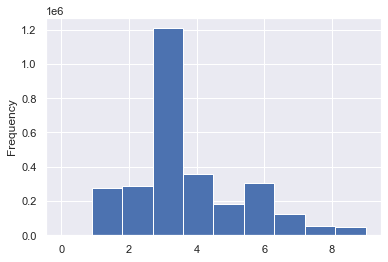

In [11]:
df['education'].plot.hist()

In [38]:
df['month'] = pd.to_numeric(df_table[0].str[64:66], errors='coerce')
df['sex'] = df_table[0].str[68]
df['age_code'] = pd.to_numeric(df_table[0].str[74:76], errors='coerce')
df['death_location_code'] = pd.to_numeric(df_table[0].str[82], errors='coerce')
df['marital_status'] = df_table[0].str[83]
df['injury_at_work'] = df_table[0].str[105]
df['manner_of_death_code'] = pd.to_numeric(df_table[0].str[106], errors='coerce')
df['activity_code'] = pd.to_numeric(df_table[0].str[143], errors='coerce')
df['injury_location'] = pd.to_numeric(df_table[0].str[144], errors='coerce')
df['ICD_code'] = df_table[0].str[145:149]
# Entity-axis conditions
df['entity_condition_count'] = pd.to_numeric(df_table[0].str[162:164], errors='coerce')
df['entity_condition_1'] = df_table[0].str[164:170]
df['entity_condition_2'] = df_table[0].str[171:177]
df['entity_condition_3'] = df_table[0].str[178:184]
df['entity_condition_4'] = df_table[0].str[185:191]
df['entity_condition_5'] = df_table[0].str[192:198]
df['entity_condition_6'] = df_table[0].str[199:205]
df['entity_condition_7'] = df_table[0].str[206:212]
df['entity_condition_8'] = df_table[0].str[213:219]
df['entity_condition_9'] = df_table[0].str[220:226]
# continue until condition_20

# Record axis conditions
df['record_condition_count'] = pd.to_numeric(df_table[0].str[340:342], errors='coerce')
df['record_condition_1'] = df_table[0].str[343:347]
df['record_condition_2'] = df_table[0].str[348:352]
df['record_condition_3'] = df_table[0].str[353:357]
df['record_condition_4'] = df_table[0].str[358:362]
df['record_condition_5'] = df_table[0].str[363:367]
df['record_condition_6'] = df_table[0].str[368:372]
# continue until condition 20

# Race (bridged and unbridged)
df['bridged_race'] = pd.to_numeric(df_table[0].str[444:446], errors='coerce')


In [39]:
df

,data_year,education,month,sex,age_code,death_location_code,marital_status,injury_at_work,manner_of_death_code,activity_code,...,entity_condition_8,entity_condition_9,record_condition_count,record_condition_1,record_condition_2,record_condition_3,record_condition_4,record_condition_5,record_condition_6,bridged_race
0,2018,3.0,1.0,F,35.0,1.0,D,U,7.0,NaN,...,,,3.0,A419,J189,J869,,,,1.0
1,2018,3.0,1.0,M,31.0,7.0,S,N,1.0,9.0,...,,,5.0,V475,S021,S099,T099,T149,,3.0
2,2018,6.0,1.0,M,44.0,6.0,D,U,7.0,NaN,...,,,1.0,C61,,,,,,1.0
3,2018,2.0,1.0,M,44.0,1.0,W,U,7.0,NaN,...,,,3.0,A419,I509,R688,,,,1.0
4,2018,4.0,1.0,F,32.0,1.0,S,U,7.0,NaN,...,62D649,63E880,8.0,K701,D649,D689,E880,G934,K703,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2846300,2018,9.0,10.0,F,39.0,6.0,M,U,7.0,NaN,...,,,2.0,J961,I219,,,,,1.0
2846301,2018,1.0,12.0,F,2.0,1.0,S,U,7.0,NaN,...,,,1.0,P072,,,,,,1.0
2846302,2018,1.0,12.0,F,14.0,1.0,S,U,7.0,NaN,...,,,6.0,Q913,A419,I500,I510,P293,R090,2.0
2846303,2018,3.0,10.0,M,38.0,6.0,S,U,7.0,NaN,...,,,3.0,I251,I469,I499,,,,1.0


In [14]:
df.activity_code.isna().sum()

2605199

In [ ]:
df_new = pd.read_csv()